# Code base
Do not modify this file

In [2]:
import json

In [3]:
with open("./dataset/Boston_Buildings_with_Roof_Breaks.geojson", "r") as f:
    data = json.load(f)
print(len(data))

2


In [4]:
data.keys()

dict_keys(['type', 'features'])

In [5]:
print(data["type"])
print(len(data["features"]))


FeatureCollection
128564


In [6]:
print(data["features"][0])
print(data["features"][0]["geometry"])
print(data["features"][0]["geometry"]["coordinates"])
print(data["features"][0]["geometry"]["coordinates"][0])
print(data["features"][0]["geometry"]["coordinates"][0][0])


{'type': 'Feature', 'id': 1, 'geometry': {'type': 'Polygon', 'coordinates': [[[-71.16550426699996, 42.346359101000075], [-71.16557782699994, 42.34636435900006], [-71.16558728599995, 42.34629152900004], [-71.16555195199999, 42.34628899300003], [-71.16555607699996, 42.34625723700003], [-71.16549645999999, 42.34625297600007], [-71.16549586399998, 42.34625756500003], [-71.16549241199994, 42.34628413400003], [-71.16545331599997, 42.34628133900003], [-71.16545264099994, 42.34628653900006], [-71.16544377699995, 42.346354777000045], [-71.16548696799998, 42.34635786500007], [-71.16550426699996, 42.346359101000075]]]}, 'properties': {'OBJECTID': 1, 'PART_USE': 'R1', 'PART_BRA_U': 'R1', 'GRND_ELEV_2010': 54.8193016, 'ROOF_ELEV_2010': 71.71, 'BLDG_HGT_2010': 16.89069839, 'IEL_TYPE': 'BLDG', 'Land_Use': 'R1', 'BRA_Land_Use': 'R1', 'Added': None, 'Shape_Length': 0.0004797210405790615, 'Shape_Area': 1.178902058491782e-08, 'shape_wkt': None}}
{'type': 'Polygon', 'coordinates': [[[-71.16550426699996, 4

In [12]:
coordinates = [feature["geometry"]["coordinates"] for feature in data["features"]]

100%|██████████| 128564/128564 [00:01<00:00, 75874.02it/s]


Total points collected: 2082355


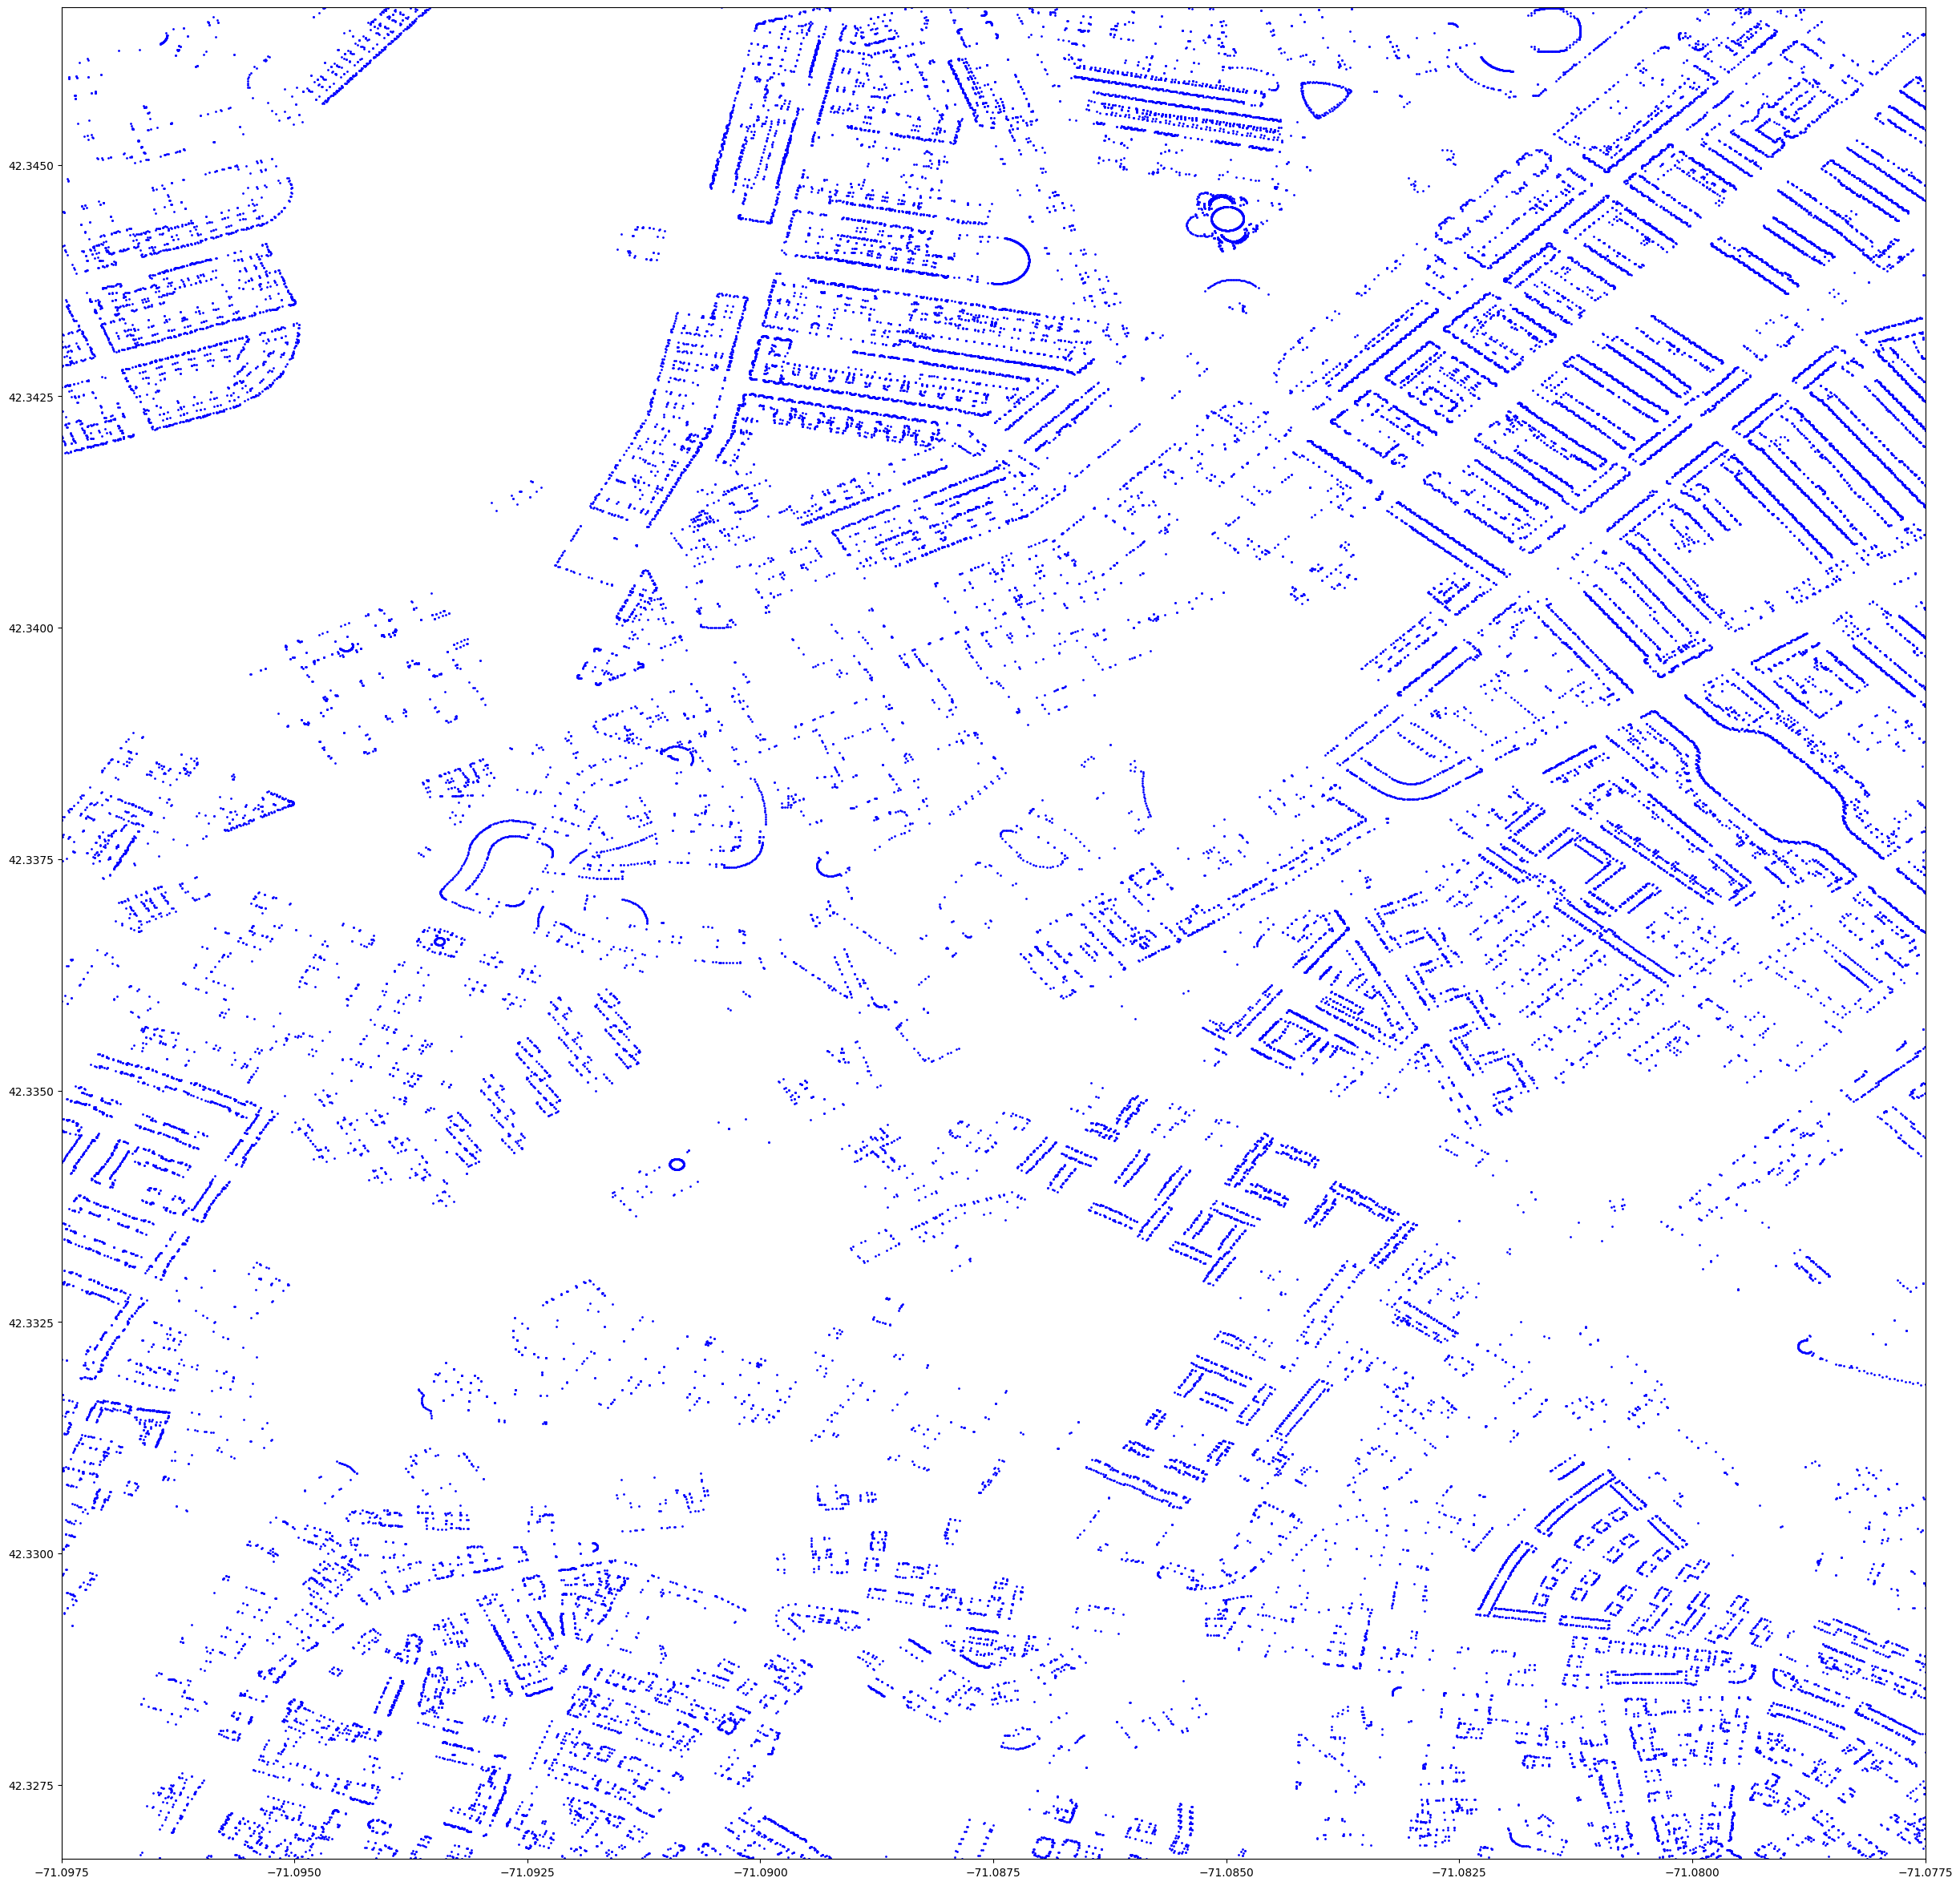

In [18]:
import tqdm
import matplotlib.pyplot as plt
import numpy as np
points = []
for feature in tqdm.tqdm(data["features"]):
    geom = feature["geometry"]
    if geom["type"] == "Polygon":
        if len(geom["coordinates"]) > 0:
            outer_ring = geom["coordinates"][0]
            for coord in outer_ring:
                if isinstance(coord, (list, tuple)) and len(coord) >= 2:
                    points.append(coord[:2])
    elif geom["type"] == "MultiPolygon":
        for polygon in geom["coordinates"]:
            outer_ring = polygon[0]
            for coord in outer_ring:
                if isinstance(coord, (list, tuple)) and len(coord) >= 2:
                    points.append(coord[:2])
                    
points = np.array(points)
print(f"Total points collected: {points.shape[0]}")




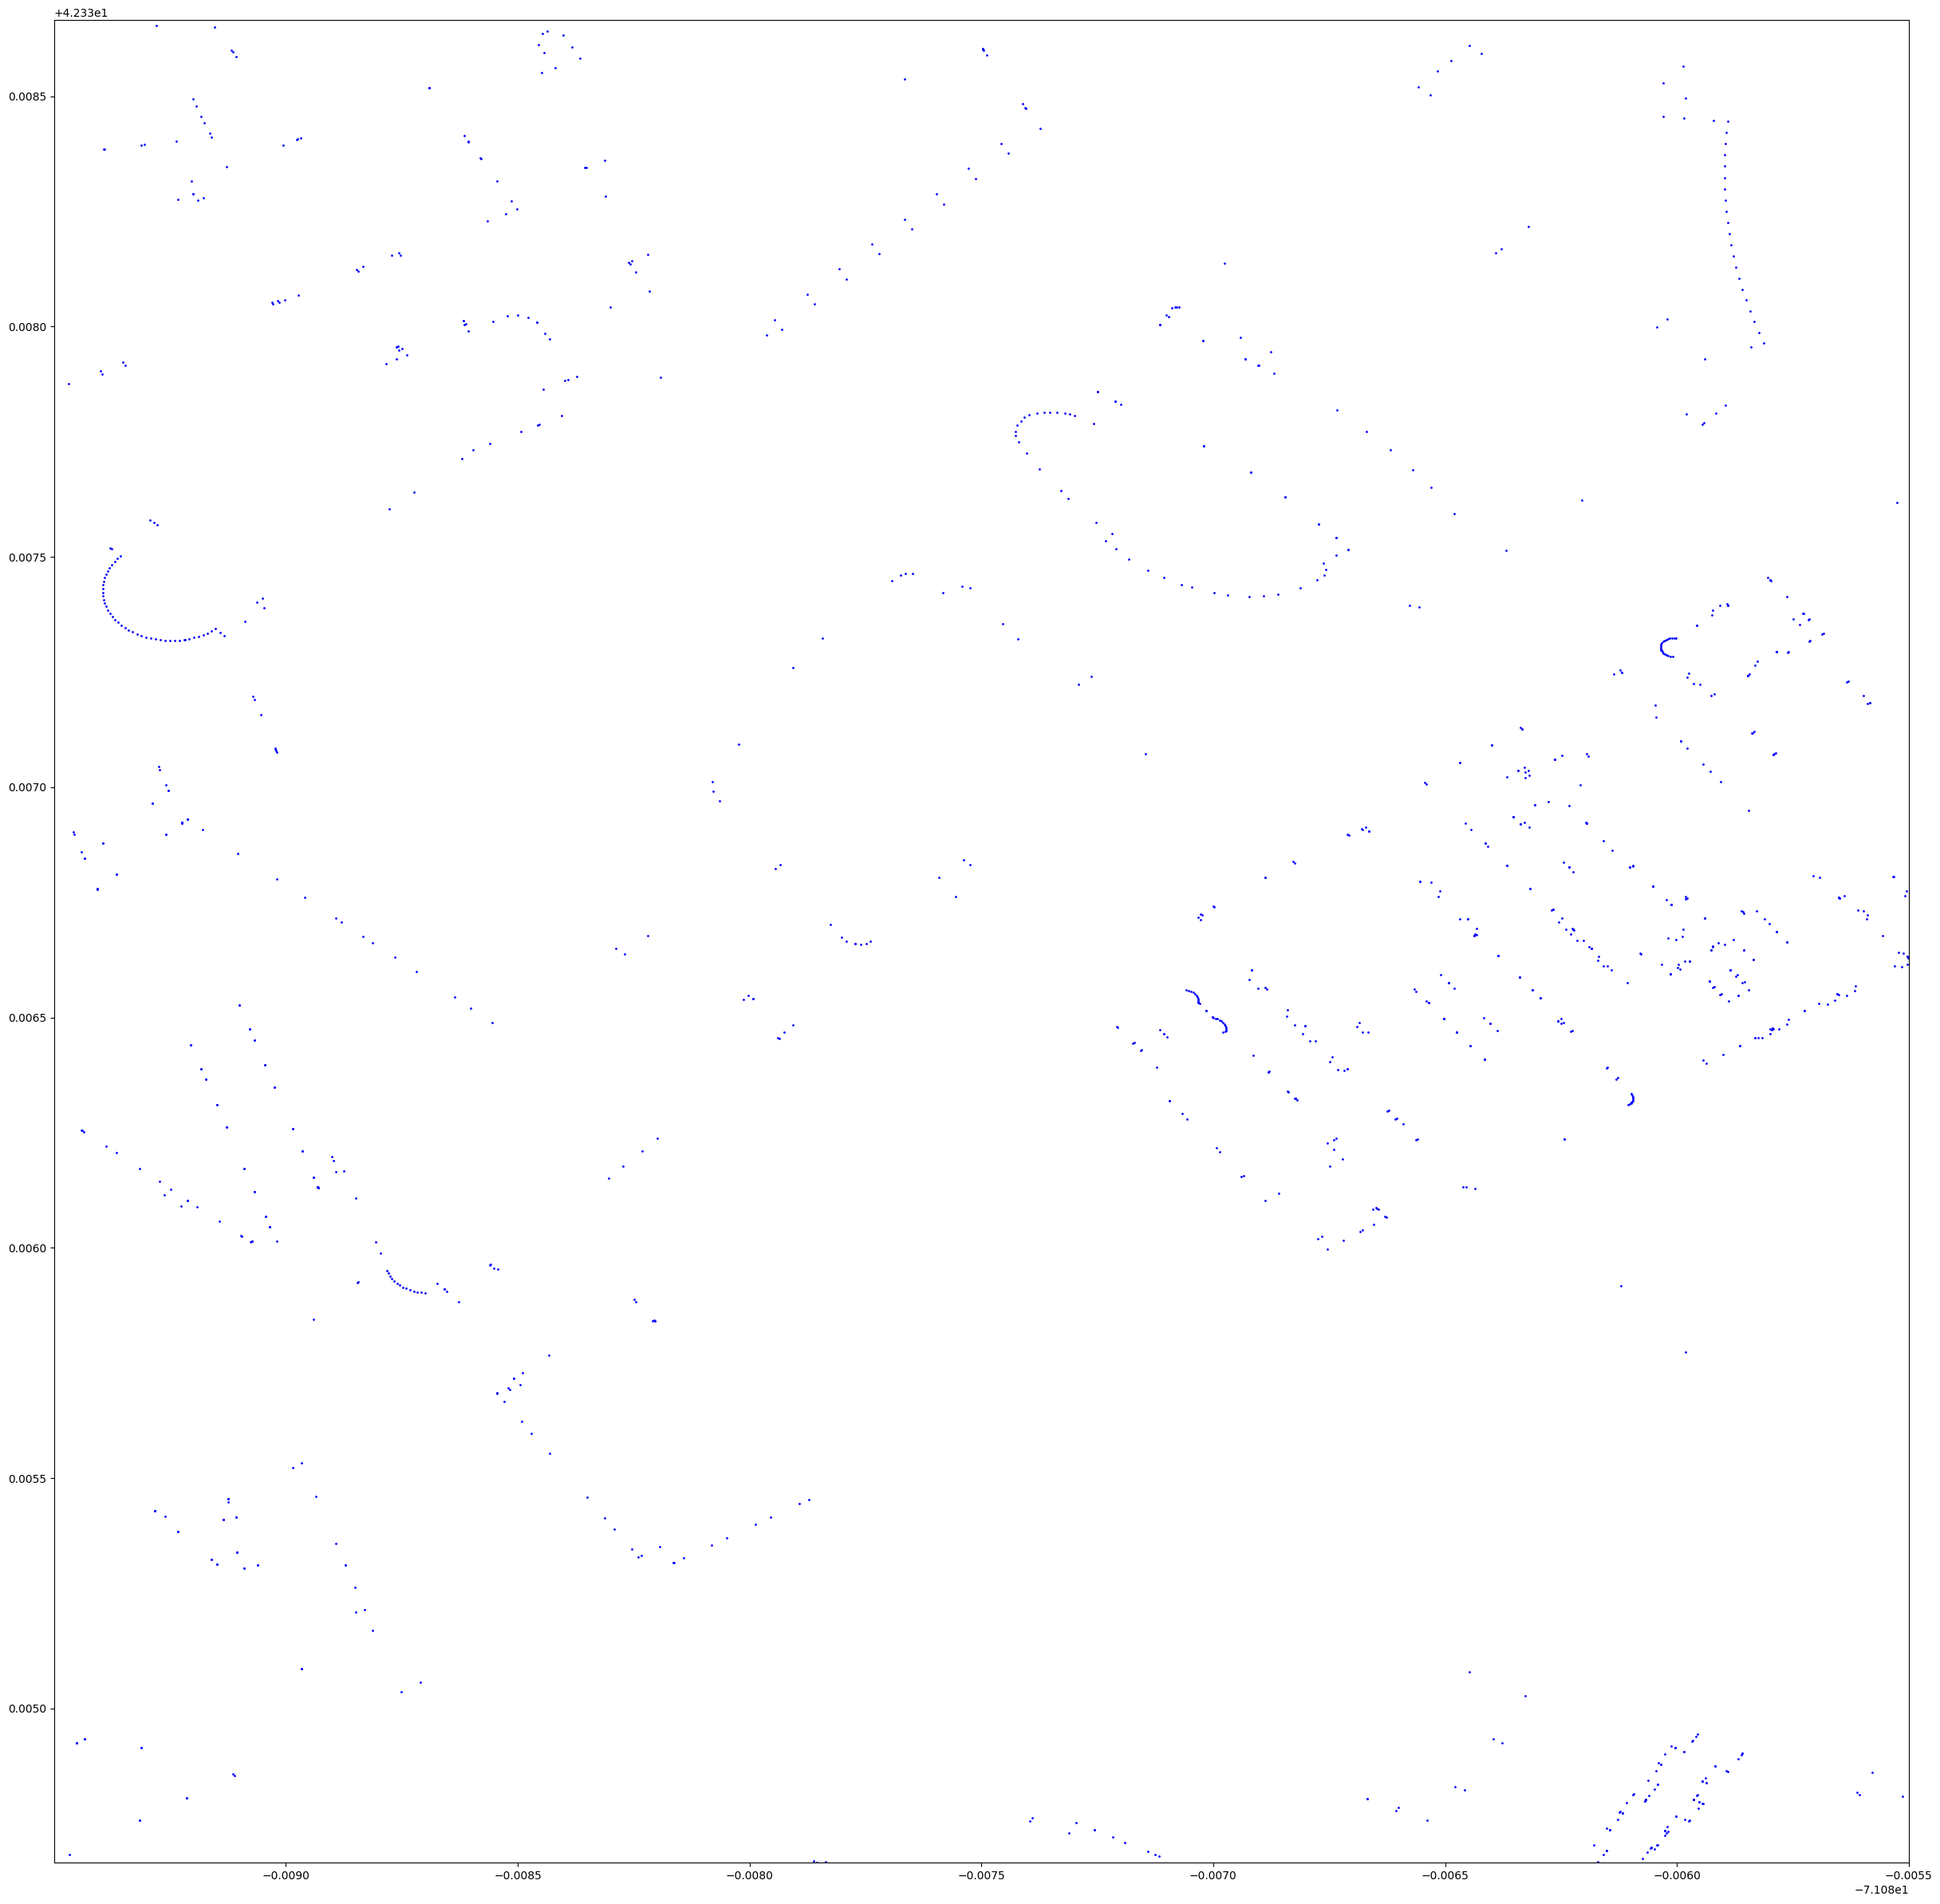

In [26]:
fig, axs = plt.subplots(1, 1, figsize=(30, 30))
axs.scatter(points[:, 0], points[:, 1], s=1, c="blue")
northeastern_coord = (42.33666532, -71.08749965)
fig_range = 0.002
axs.set_xlim(northeastern_coord[1]-fig_range, northeastern_coord[1]+fig_range)
axs.set_ylim(northeastern_coord[0]-fig_range, northeastern_coord[0]+fig_range)
plt.show()